# **Relationship Between Airbnb Hosuing Price and Crime in NYC - 44**

Group Members:

Emre Eren 25139

Mehmet Kerem Özcoşar 25225

## Introduction



First of all, this project is aiming ***to find the relationship between price/
housing distribution of Airbnb rentals and crimes in NYC.*** To be able to achieve the results of this project, it was planned to divide it to sub-problems. Therefore,  **firstly**, ***we clean our first data set***, which is New York City Airbnb,  *in order to use only data that we needed*. Then we *manipulate this dataset in order to analyze New York City Airbnb* open data. Then, briefly,* we visualize this dataset to be able to interpret what are we handle *(for example, price distribution, house type distribution, distributions neighborhood by neighborhood etc.). After that part, we introduce additional dataset which is  NYPD Arrest Data (2019).  Like we did in previous part *we firstly clean our data according to what are our needs*. Then, again we visualize this data set to obtain crime distribution, crime rates neighbor by neighbor, which crimes are more common etc. 






### Problem Definition

We try to find correlation between Airbnb price distribution with the rate of crime in the borough of NYC

### Utilezed Datasets
***First dataset*** that we used is New York City Airbnb open data. This dataset includes information about; listing id, name of listing, host id, host name, location, neighbourhood , latitude, longitude, room type, price (in dollars), amount of nights minimum, number of review, number of reviews per month, amount of listing per host and number of days when listing is available for booking.

***Second dataset*** is NYPD Arrest Data (2019). These datasets are explained more clearly in the parts that they introduced. This dataset includes a lot of information that we do not interested. We interested in only information about crime type, latitude, longitude and borough.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import join 
%matplotlib inline

#Data Exploration









## Airbnb Dataset


In [ ]:
data_path = "/content/gdrive/My Drive"
filename = "AB_NYC_2019.csv"

df = pd.read_csv(join(data_path, filename), delimiter=",")

NameError: ignored

In [ ]:
df.head()

NameError: ignored

**CLEAN THE DATASET**

We move the unnecessary column in the dataframe and drop them in dataframe





In [ ]:
df.drop(["id","name","host_id","host_name","neighbourhood","last_review"], axis=1, inplace=True)
df.head()

Types of columns


In [ ]:
df.dtypes

Fınd the NA's in the dataframe


In [ ]:
df.isnull().sum()
#df.dropna(how="any")


Fill NAs in reviews per month with 0s


In [ ]:
df.fillna({"reviews_per_month":0}, inplace = True)
df.isnull().sum()

### Price Distribution

*   Let's try to find relationship between the price and the other information in dataframe

* As you can see in the below Manhattan has the more expensive house's prices rather than the other boroguhs of NYC.



In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)
sub_r = df[df['neighbourhood_group'] == "Brooklyn"]["price"]
sub_m = df[df['neighbourhood_group'] == "Manhattan"]["price"]
sub_q = df[df['neighbourhood_group'] == "Queens"]["price"]
sub_b = df[df['neighbourhood_group'] == "Bronx"]["price"]
sub_s = df[df['neighbourhood_group'] == "Staten Island"]["price"]
sns.kdeplot(sub_r, shade=True, ax=ax, label="Brooklyn")
sns.kdeplot(sub_m, shade=True, ax=ax, label="Manhattan")
sns.kdeplot(sub_q, shade=True, ax=ax, label="Queens")
sns.kdeplot(sub_b, shade=True, ax=ax, label="Bronx")
sns.kdeplot(sub_s, shade=True, ax=ax, label="Staten Island")
plt.show()


DENSITY OF PRICE DISTRIBUTION IN BOROUGH

As you can see the shown below density of price distribution in Manhattan more narrow than others because price in Manhattan more changable and expensive than the other borough






In [ ]:
den_price=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=den_price, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

* As can you see most higher and the most wider plot belongs to Manhattan based on the minimum nights

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)

minn_r = df[df['neighbourhood_group'] == "Brooklyn"]["minimum_nights"]
minn_m = df[df['neighbourhood_group'] == "Manhattan"]["minimum_nights"]                 
minn_q = df[df['neighbourhood_group'] == "Queens"]["minimum_nights"]
minn_b = df[df['neighbourhood_group'] == "Bronx"]["minimum_nights"]
minn_s = df[df['neighbourhood_group'] == "Staten Island"]["minimum_nights"]

sns.kdeplot(minn_r, shade=True, ax=axes, label="Brooklyn")
sns.kdeplot(minn_m, shade=True, ax=axes, label="Manhattan")
sns.kdeplot(minn_q, shade=True, ax=axes, label="Queens")
sns.kdeplot(minn_b, shade=True, ax=axes, label="Bronx")
sns.kdeplot(minn_s, shade=True, ax=axes, label="Staten Island")
plt.show()

In [ ]:
from collections import Counter
df_copy = df["room_type"]
counts = Counter(df_copy)
counts

In [ ]:
plt.bar(counts.keys(), counts.values())
plt.show()

DISTRINBUTION OF ROOM TYPE IN THE NEIGHBOURHOOD GROUP


In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Total Number of Airbnb in Neighbourhoods Group with Room Type Category', fontsize=17)
plt.xlabel('Neighbourhood Group')
plt.ylabel("Number of Room Types")
plt.legend(frameon=False, fontsize=12)

Number of Entire home in Manhattan is more than others and this can be the reason of why Manhattan has more expensive house, because price of entire room is more expensive than other room types

In [ ]:
sub_7=df.loc[df['neighbourhood_group'].isin(['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood_group', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [ ]:
data = df.neighbourhood_group.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Borough")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [ ]:
bins = np.linspace(1,365)

plt.hist(minn_r, bins,alpha = 0.9, label = "brooklyn")
plt.hist(minn_m,bins,alpha = 0.9, label = "manhattan")
plt.hist(minn_q,bins,alpha = 0.9, label = "queens")
plt.hist(minn_b, bins,alpha = 0.9, label = "bronx")
plt.hist(minn_s, bins,alpha = 0.9, label = "staten ısland")
plt.legend(loc = "upper right")
plt.show()

*Availibity of homes maybe the other affects of price distribution
because availibitly of home may increase the demand of home and it cause the increase the price of home*


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)
ava_r = df[df['neighbourhood_group'] == "Brooklyn"]["availability_365"]
ava_m = df[df['neighbourhood_group'] == "Manhattan"]["availability_365"]
ava_q = df[df['neighbourhood_group'] == "Queens"]["availability_365"]
ava_b = df[df['neighbourhood_group'] == "Bronx"]["availability_365"]
ava_s = df[df['neighbourhood_group'] == "Staten Island"]["availability_365"]
sns.kdeplot(ava_r, shade=True, ax=ax, label="Brooklyn")
sns.kdeplot(ava_m, shade=True, ax=ax, label="Manhattan")
sns.kdeplot(ava_q, shade=True, ax=ax, label="Queens")
sns.kdeplot(ava_b, shade=True, ax=ax, label="Bronx")
sns.kdeplot(ava_s, shade=True, ax=ax, label="Staten Island")
plt.show()

PRICE DISTRIBUTION VISUALIZING WITH MAP


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)

In [ ]:

viz_4=den_price.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, figsize=(10,10))
viz_4.legend()

* As the shown below Manhattan has the most expensive airbnb houses

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
den_price.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, zorder=5)
plt.legend()
plt.show()

**Correlation Map**

let's find the most significant factor of price distribution with correlation map



In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='Reds')

**Price has strong relationship with avaliability and calculated host listing count**

In [ ]:
df.drop('price', axis=1).corrwith(df.price).plot.barh(figsize=(10, 7), 
                                                        title='Correlation with Response Variable',
                                                        fontsize=15, grid=True)

## Crime Dataset
 

In [ ]:
data_path2 = "/content/gdrive/My Drive"
filename = "NYPD_Arrest_Data__Year_to_Date_.csv"

crime = pd.read_csv(join(data_path2, filename), delimiter=",")
crimeX = crime # this will be used for to be able to use raw data

In [ ]:
crime.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


### Clean the Crime Datasets


*   Remove the null value in the columns
*   Remove the unnecessary columns in the data
*   Give more clear name for information in data



In [ ]:
crime.isnull().sum()

ARREST_KEY              0
ARREST_DATE             0
PD_CD                  41
PD_DESC               159
KY_CD                 159
OFNS_DESC             159
LAW_CODE                0
LAW_CAT_CD           1369
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

In [ ]:
crime = crime[['ARREST_BORO','OFNS_DESC', 'Latitude', 'Longitude','ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD' ]]
crime = crime.rename(columns={'OFNS_DESC':'Crime_desc'})
crime.fillna({"Crime_desc":0}, inplace = True)
crime.isnull().sum()


ARREST_BORO        0
Crime_desc         0
Latitude           0
Longitude          0
ARREST_PRECINCT    0
X_COORD_CD         0
Y_COORD_CD         0
dtype: int64

In [ ]:
crime.head()

,ARREST_BORO,Crime_desc,Latitude,Longitude,ARREST_PRECINCT,X_COORD_CD,Y_COORD_CD
0,M,INTOXICATED & IMPAIRED DRIVING,40.841085,-73.939769,33,1000916,245710
1,Q,THEFT-FRAUD,40.596012,-73.742116,101,1055868,156522
2,M,HOMICIDE-NEGLIGENT-VEHICLE,40.789803,-73.952289,23,997462,227024
3,S,CRIMINAL MISCHIEF & RELATED OF,40.645023,-74.077217,120,962822,174282
4,M,ASSAULT 3 & RELATED OFFENSES,40.787875,-73.928182,25,1004138,226326


In [ ]:
def changeName(ARREST_BORO):
  if ARREST_BORO == "M":
    return "Manhattan"
  if ARREST_BORO == "K":
    return "Brooklyn"
  if ARREST_BORO == "Q":
    return "Queens"
  if ARREST_BORO == "S":
    return "Staten Island"
  if ARREST_BORO == "B":
    return "Bronx"
crime["Borough"] = crime["ARREST_BORO"].apply(changeName)
crime.head()

,ARREST_BORO,Crime_desc,Latitude,Longitude,ARREST_PRECINCT,X_COORD_CD,Y_COORD_CD,Borough
0,M,INTOXICATED & IMPAIRED DRIVING,40.841085,-73.939769,33,1000916,245710,Manhattan
1,Q,THEFT-FRAUD,40.596012,-73.742116,101,1055868,156522,Queens
2,M,HOMICIDE-NEGLIGENT-VEHICLE,40.789803,-73.952289,23,997462,227024,Manhattan
3,S,CRIMINAL MISCHIEF & RELATED OF,40.645023,-74.077217,120,962822,174282,Staten Island
4,M,ASSAULT 3 & RELATED OFFENSES,40.787875,-73.928182,25,1004138,226326,Manhattan


In [ ]:
crime.drop(["ARREST_BORO"], axis=1, inplace=True)
crime.head()

,Crime_desc,Latitude,Longitude,ARREST_PRECINCT,X_COORD_CD,Y_COORD_CD,Borough
0,INTOXICATED & IMPAIRED DRIVING,40.841085,-73.939769,33,1000916,245710,Manhattan
1,THEFT-FRAUD,40.596012,-73.742116,101,1055868,156522,Queens
2,HOMICIDE-NEGLIGENT-VEHICLE,40.789803,-73.952289,23,997462,227024,Manhattan
3,CRIMINAL MISCHIEF & RELATED OF,40.645023,-74.077217,120,962822,174282,Staten Island
4,ASSAULT 3 & RELATED OFFENSES,40.787875,-73.928182,25,1004138,226326,Manhattan


### Visualizing the Crime Dataset

Total Number of Crimes in Borough

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
No handles with labels found to put in legend.


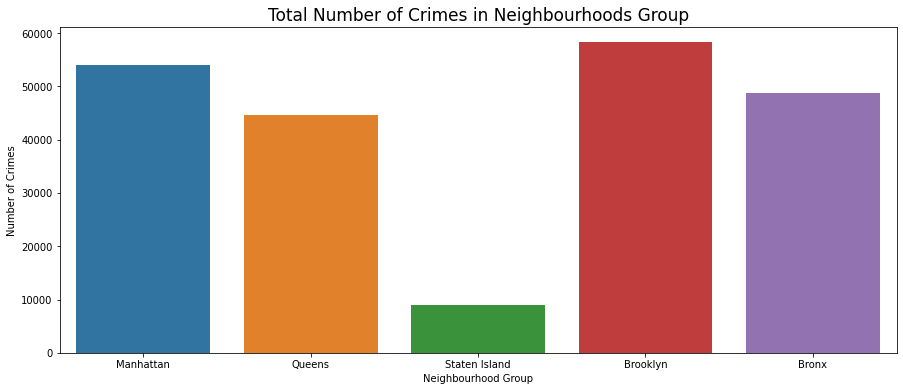

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data=crime, x='Borough')
plt.title('Total Number of Crimes in Neighbourhoods Group', fontsize=17)
plt.xlabel('Neighbourhood Group')
plt.ylabel("Number of Crimes")
plt.legend(frameon=False, fontsize=12)

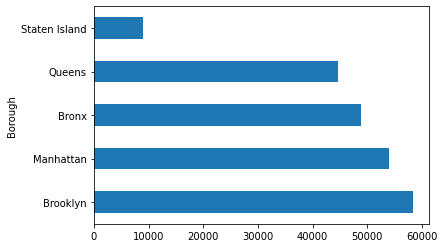

In [ ]:
crime["Borough"].groupby(crime["Borough"]).count().sort_values(ascending=False).plot(kind="barh")

TOP 30 CRIMES IN NYC


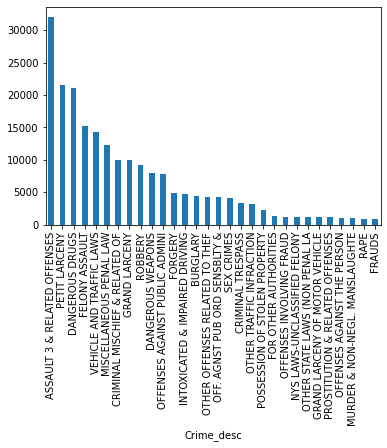

In [ ]:
crime.groupby('Crime_desc').size().sort_values(ascending=False).head(30).plot(kind="bar")

TYPE OF CRIME DISTRIBUTION WITH RESPECT TO BOROUGH

* According to distinct features : 
 

*   Manhattan has traffic laws and petit larcency as distinct features
*   Brooklyn has criminal crimes as distinct features
*   Bronx has assult related offenses

* As can be seen in the plot Manhattan and Brooklyn have wider range of crime types


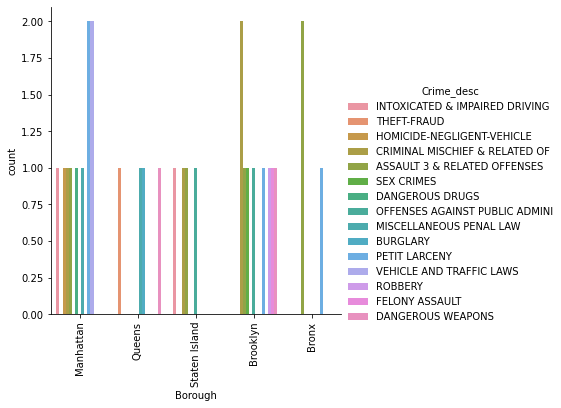

In [ ]:
sub_crime=crime.head(30).loc[crime['Borough'].isin(['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])]
#using catplot to represent multiple interesting attributes together and a count
viz_crime=sns.catplot(x='Borough', hue='Crime_desc', data=sub_crime, kind='count')
viz_crime.set_xticklabels(rotation=90)



* Number of crime that occurs borough by borough






In [ ]:
from collections import Counter
crime_copy = crime["Borough"]
count = Counter(crime_copy)
count

Counter({'Bronx': 48815,
         'Brooklyn': 58288,
         'Manhattan': 53915,
         'Queens': 44567,
         'Staten Island': 9032})









*  Crime rates according to distinct boroughs





In [ ]:
sub = pd.Series(count)
population = {'Manhattan': 1629000, 'Brooklyn': 2533000, 'Queens': 2273000, 'Bronx': 1418000, 'Staten Island': 476143}
rate_m = count['Manhattan']/population['Manhattan']
rate_r = count['Brooklyn']/population['Brooklyn']
rate_q = count['Queens']/population['Queens']
rate_b = count['Bronx']/population['Bronx']
rate_s = count['Staten Island']/population['Staten Island']
print("Crime rate Manhattan:",rate_m, "Crime rate Brooklyn:",rate_r, "Crime rate Queens:",rate_q, "Crime rate Bronx:",rate_b, "Crime rate Staten Island:", rate_s)

Crime rate Manhattan: 0.03309699201964395 Crime rate Brooklyn: 0.023011448874851955 Crime rate Queens: 0.01960712714474263 Crime rate Bronx: 0.03442524682651622 Crime rate Staten Island: 0.018969091218394473




*  Piechart according to crime rates


---


1. With this piechart we are able to see which borugh has the highest crime rate and which has lowest crime rate.






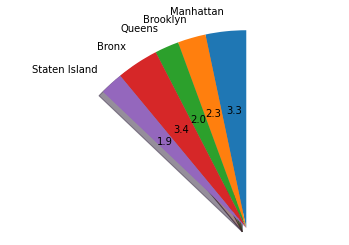

In [ ]:
labels = 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'
sizes = [0.03309699201964395, 0.023011448874851955, 0.01960712714474263, 0.03442524682651622,0.018969091218394473 ]
explode = (0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f', shadow=True, startangle=90)
plt.axis('equal') 

plt.show()



* Crime map by NYC's borughs



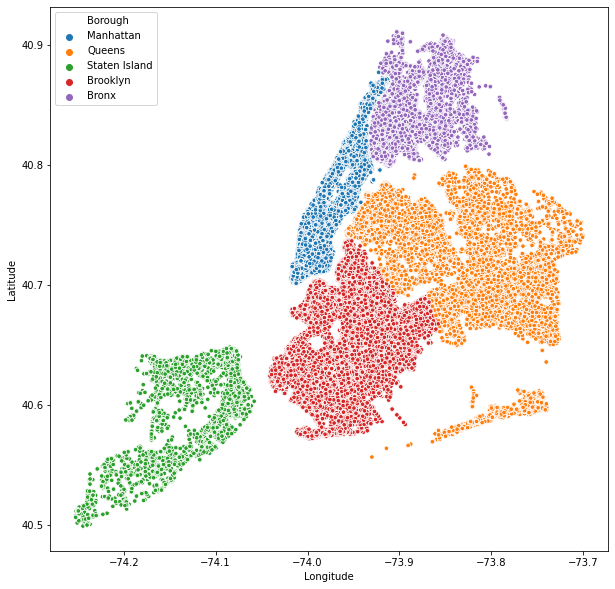

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Borough',s=20, data=crime)



* Heat map of crime


---


1. We choose specifc type of crimes that can be effect housing/pricing distribution of airbnb
2. We can see which region is more dangerous 






/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


(40.49, 40.92)

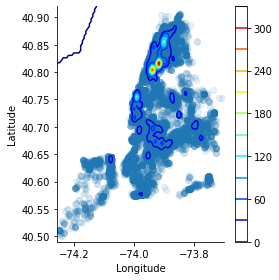

In [ ]:
crimes_new = crime[(crime['Crime_desc'] == 'SEX CRIMES') | (crime['Crime_desc'] == 'HOMICIDE') | (crime['Crime_desc'] == 'ASSAULT 3') | 
                   (crime['Crime_desc'] == 'CRIMINAL')| (crime['Crime_desc'] == 'DANGEROUS DRUGS')]
ax = sns.lmplot('Longitude', 'Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                size=4, 
                scatter_kws={'alpha':.1})
ax = sns.kdeplot(crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-74.258, -73.7)
ax.set_ylim(40.49,40.92)

* As you can see in the heat map above Bronx has the more dangerous crime rates.



*  In this part again we see serious crimes on a map but different way



In [ ]:
df_deadly = crime[(crime['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES') | (crime['Crime_desc'] == 'SEX CRIMES') | (crime['Crime_desc'] == 'HOMICIDE')]


In [ ]:
import folium
nyc_totalcrime_map = folium.Map(location=[40.693943, -73.985880],
                       zoom_start=12,
                       tiles="CartoDB dark_matter")

for i in range(len(df_deadly)):
    lat = df_deadly.iloc[i]['Latitude']
    lon = df_deadly.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Crime', radius=30, color='#800040', fill=True).add_to(nyc_totalcrime_map)

In [ ]:
nyc_totalcrime_map



*  Defining new dataframes according boroughs.



In [ ]:
df_M = crime[crime['Borough'] == 'Manhattan']
df_R = crime[crime['Borough'] == 'Brooklyn']
df_Q = crime[crime['Borough'] == 'Queens']
df_B = crime[crime['Borough'] == 'Bronx']
df_S = crime[crime['Borough'] == 'Staten Island']



* Defining new dataframes according to both borough and crime type


---



1. We use these dataframes in order to obtain distribution of crime types on different borughs.
2. With these dataframes we are able to determine which crime type is more common in which borugh. Then we can test out hypothesis borough by borough wise.





In [ ]:
df_S_Assault = df_S[df_S['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']
df_M_Assault = df_M[df_M['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']
df_R_Assault = df_R[df_R['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']
df_Q_Assault = df_Q[df_Q['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']
df_B_Assault = df_B[df_B['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']

df_S_Theft = df_S[df_S['Crime_desc'] == 'THEFT-FRAUD']
df_M_Theft = df_M[df_M['Crime_desc'] == 'THEFT-FRAUD']
df_R_Theft = df_R[df_R['Crime_desc'] == 'THEFT-FRAUD']
df_Q_Theft = df_Q[df_Q['Crime_desc'] == 'THEFT-FRAUD']
df_B_Theft = df_B[df_B['Crime_desc'] == 'THEFT-FRAUD']

df_S_Homicide = df_S[df_S['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']
df_M_Homicide = df_M[df_M['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']
df_R_Homicide = df_R[df_R['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']
df_Q_Homicide = df_Q[df_Q['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']
df_B_Homicide = df_B[df_B['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']

df_S_Criminal = df_S[df_S['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']
df_M_Criminal = df_M[df_M['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']
df_R_Criminal = df_R[df_R['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']
df_Q_Criminal = df_Q[df_Q['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']
df_B_Criminal = df_B[df_B['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']

df_S_SexCrimes = df_S[df_S['Crime_desc'] == 'SEX CRIMES']
df_M_SexCrimes = df_M[df_M['Crime_desc'] == 'SEX CRIMES']
df_R_SexCrimes = df_R[df_R['Crime_desc'] == 'SEX CRIMES']
df_Q_SexCrimes = df_Q[df_Q['Crime_desc'] == 'SEX CRIMES']
df_B_SexCrimes = df_B[df_B['Crime_desc'] == 'SEX CRIMES']





1. Crime type : ASSAULT 3 & RELATED OFFENSES
2. Crime type : THEFT-FRAUD
3. Crime type : CRIMINAL MISCHIEF & RELATED OF
4. Crime type : SEX CRIMES





#### NYC assult & related offenses map

In [ ]:
nyc_assault_map = folium.Map(location=[40.693943, -73.985880],
                       zoom_start=10,
                       tiles="CartoDB dark_matter")

for i in range(len(df_S_Assault)):
    lat = df_S_Assault.iloc[i]['Latitude']
    lon = df_S_Assault.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#800080', fill=True).add_to(nyc_assault_map)

for i in range(len(df_M_Assault)):
    lat = df_M_Assault.iloc[i]['Latitude']
    lon = df_M_Assault.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#900060', fill=True).add_to(nyc_assault_map)

for i in range(len(df_R_Assault)):
    lat = df_R_Assault.iloc[i]['Latitude']
    lon = df_R_Assault.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#600050', fill=True).add_to(nyc_assault_map)

for i in range(len(df_Q_Assault)):
    lat = df_Q_Assault.iloc[i]['Latitude']
    lon = df_Q_Assault.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#500030', fill=True).add_to(nyc_assault_map)

for i in range(len(df_B_Assault)):
    lat = df_B_Assault.iloc[i]['Latitude']
    lon = df_B_Assault.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#800080', fill=True).add_to(nyc_assault_map)

In [ ]:
nyc_assault_map

#### NYC theft & fraud map

In [ ]:
import folium
nyc_theft_map = folium.Map(location=[40.693943, -73.985880],
                       zoom_start=10,
                       tiles="CartoDB dark_matter")

for i in range(len(df_S_Criminal)):
    lat = df_S_Criminal.iloc[i]['Latitude']
    lon = df_S_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Theft', radius=20, color='#800080', fill=True).add_to(nyc_theft_map)

for i in range(len(df_M_Criminal)):
    lat = df_M_Criminal.iloc[i]['Latitude']
    lon = df_M_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Theft', radius=20, color='#900060', fill=True).add_to(nyc_theft_map)

for i in range(len(df_R_Criminal)):
    lat = df_R_Criminal.iloc[i]['Latitude']
    lon = df_R_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Theft', radius=20, color='#600050', fill=True).add_to(nyc_theft_map)

for i in range(len(df_Q_Criminal)):
    lat = df_Q_Criminal.iloc[i]['Latitude']
    lon = df_Q_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Theft', radius=20, color='#500030', fill=True).add_to(nyc_theft_map)

for i in range(len(df_B_Criminal)):
    lat = df_B_Criminal.iloc[i]['Latitude']
    lon = df_B_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Theft', radius=20, color='#800080', fill=True).add_to(nyc_theft_map)

In [ ]:
nyc_theft_map

####NYC criminal mischief & related offenses MAP

In [ ]:
nyc_criminal_map = folium.Map(location=[40.693943, -73.985880],
                       zoom_start=10,
                       tiles="CartoDB dark_matter")

for i in range(len(df_S_Criminal)):
    lat = df_S_Criminal.iloc[i]['Latitude']
    lon = df_S_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC criminal', radius=20, color='#800080', fill=True).add_to(nyc_criminal_map)

for i in range(len(df_M_Criminal)):
    lat = df_M_Criminal.iloc[i]['Latitude']
    lon = df_M_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC criminal', radius=20, color='#900060', fill=True).add_to(nyc_criminal_map)

for i in range(len(df_R_Criminal)):
    lat = df_R_Criminal.iloc[i]['Latitude']
    lon = df_R_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC criminal', radius=20, color='#600050', fill=True).add_to(nyc_criminal_map)

for i in range(len(df_Q_Criminal)):
    lat = df_Q_Criminal.iloc[i]['Latitude']
    lon = df_Q_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC criminal', radius=20, color='#500030', fill=True).add_to(nyc_criminal_map)

for i in range(len(df_B_Criminal)):
    lat = df_B_Criminal.iloc[i]['Latitude']
    lon = df_B_Criminal.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC criminal', radius=20, color='#800080', fill=True).add_to(nyc_criminal_map)

In [ ]:
nyc_criminal_map

####NYC sex crime map

In [ ]:
nyc_sexcrime_map = folium.Map(location=[40.693943, -73.985880],
                       zoom_start=10,
                       tiles="CartoDB dark_matter")

for i in range(len(df_S_SexCrimes)):
    lat = df_S_SexCrimes.iloc[i]['Latitude']
    lon = df_S_SexCrimes.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#800080', fill=True).add_to(nyc_sexcrime_map)

for i in range(len(df_M_SexCrimes)):
    lat = df_M_SexCrimes.iloc[i]['Latitude']
    lon = df_M_SexCrimes.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#900060', fill=True).add_to(nyc_sexcrime_map)

for i in range(len(df_R_SexCrimes)):
    lat = df_R_SexCrimes.iloc[i]['Latitude']
    lon = df_R_SexCrimes.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#600050', fill=True).add_to(nyc_sexcrime_map)

for i in range(len(df_Q_SexCrimes)):
    lat = df_Q_SexCrimes.iloc[i]['Latitude']
    lon = df_Q_SexCrimes.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#500030', fill=True).add_to(nyc_sexcrime_map)

for i in range(len(df_B_SexCrimes)):
    lat = df_B_SexCrimes.iloc[i]['Latitude']
    lon = df_B_SexCrimes.iloc[i]['Longitude']
    folium.CircleMarker(location=[lat, lon], popup='NYC Sex Crime', radius=20, color='#800080', fill=True).add_to(nyc_sexcrime_map)

In [ ]:
nyc_sexcrime_map

#### HEAT MAP OF OVERALL & SPECIFIC CRIMES 

* **Heat map of crimes**


---



1. Again we divide crime types to sub crimes
2. We are able to see density of crime types amoung NYC's boroughs.










Heat map over cooridantes of crimes


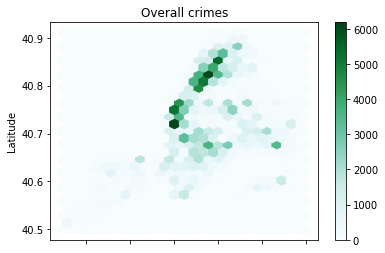

Text(0.5, 1.0, 'Criminal Mischied & Releated of')

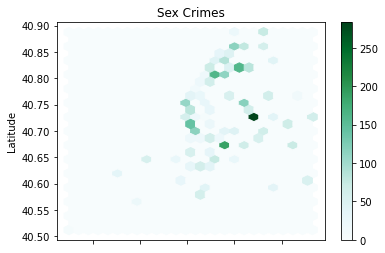

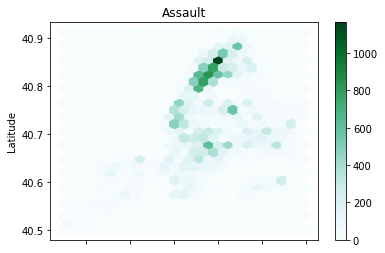

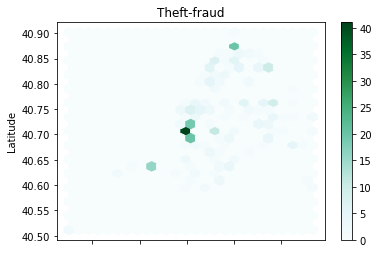

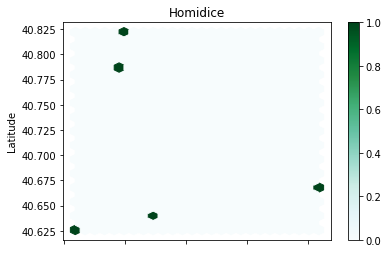

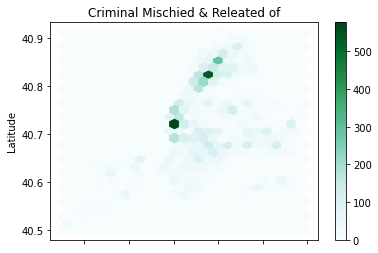

In [ ]:
df_SexCrimes = crime[crime['Crime_desc'] == 'SEX CRIMES']
df_Assault = crime[crime['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES']
df_Theft = crime[crime['Crime_desc'] == 'THEFT-FRAUD']
df_Hemidice = crime[crime['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE']
df_Criminal = crime[crime['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF']

print("Heat map over cooridantes of crimes")
crime.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Overall crimes")
plt.show()

df_SexCrimes.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Sex Crimes")

df_Assault.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Assault")

df_Theft.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Theft-fraud")

df_Hemidice.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Homidice")

df_Criminal.plot.hexbin(x='Longitude', y='Latitude', gridsize=25)
plt.title("Criminal Mischied & Releated of")


#### MAPS BASED ON DISTINCT SPECIFICATIONS

* According to distribution of crimes based on their harshness, the most harshness crimes in Brooklyn. On the other hand, non-harshness crime types in Queens at the west side and Staten Island.

Text(0.5, 1.0, 'According to Harshness of Crime')

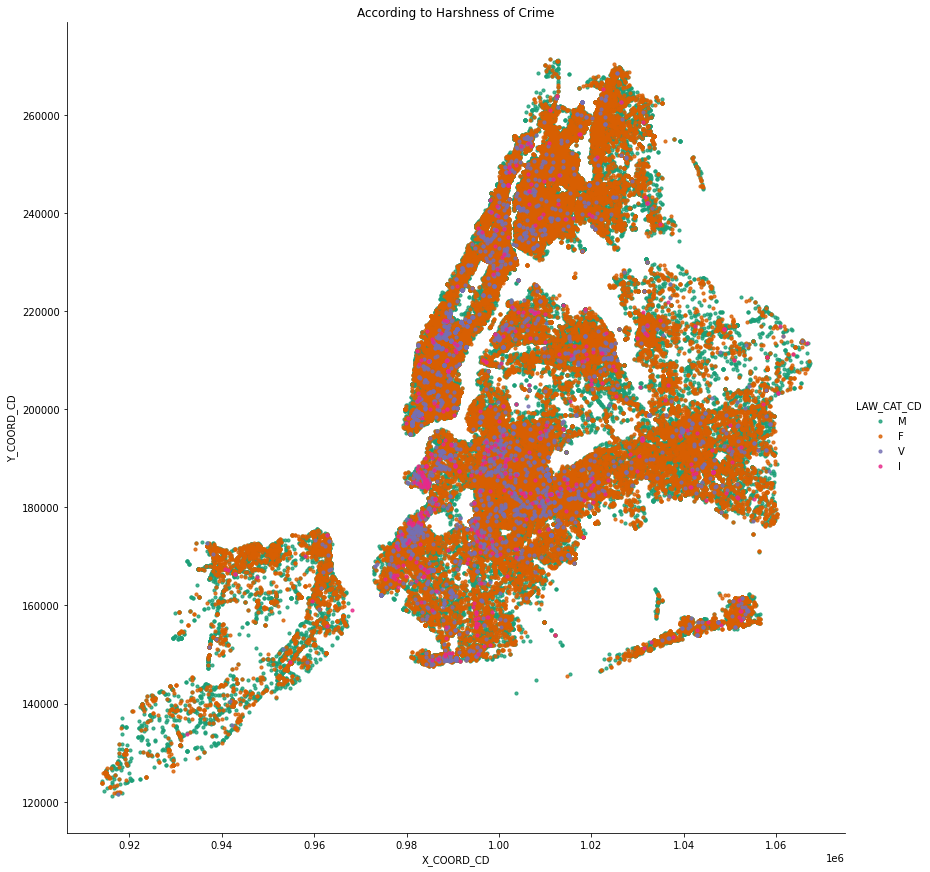

In [ ]:
new_map = crimeX.loc[(crimeX['X_COORD_CD']!=0)]
sns.lmplot('X_COORD_CD', 
           'Y_COORD_CD',
           data=new_map[:],
           fit_reg=False, 
           hue="LAW_CAT_CD",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("According to Harshness of Crime")

Text(0.5, 1.0, 'Crimes by District')

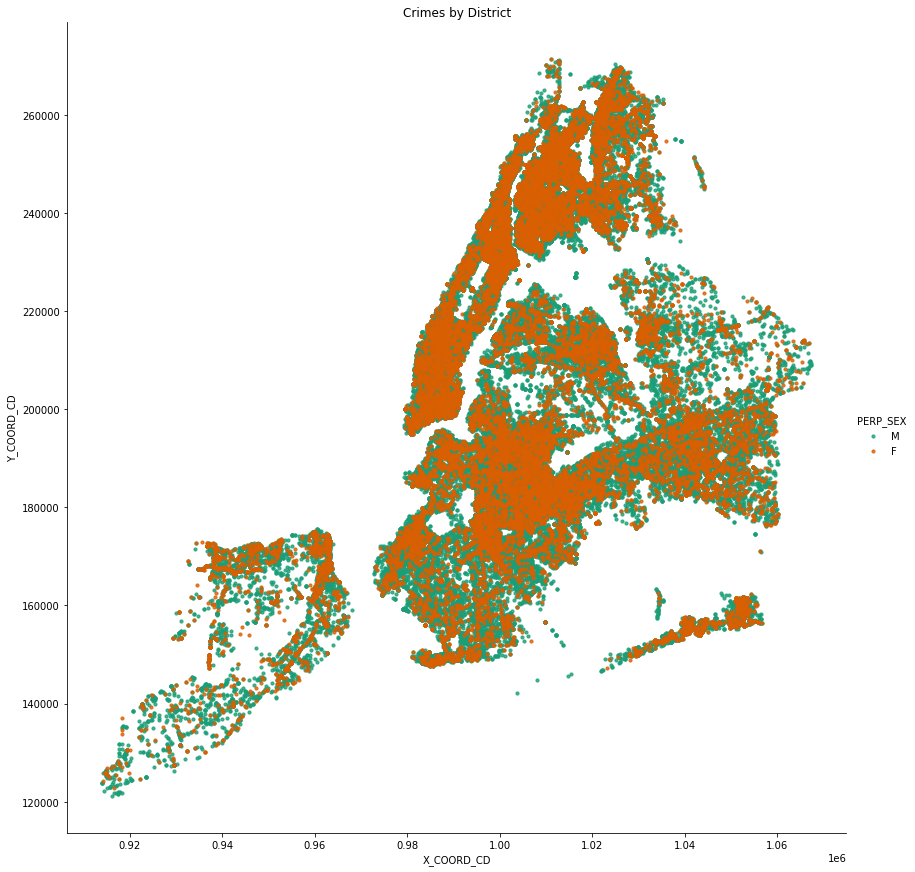

In [ ]:
new_map = crimeX.loc[(crimeX['X_COORD_CD']!=0)]
sns.lmplot('X_COORD_CD', 
           'Y_COORD_CD',
           data=new_map[:],
           fit_reg=False, 
           hue="PERP_SEX",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

* Plot is dominated by Asians and White Hispanic races. 

Text(0.5, 1.0, 'Crimes Based on Race')

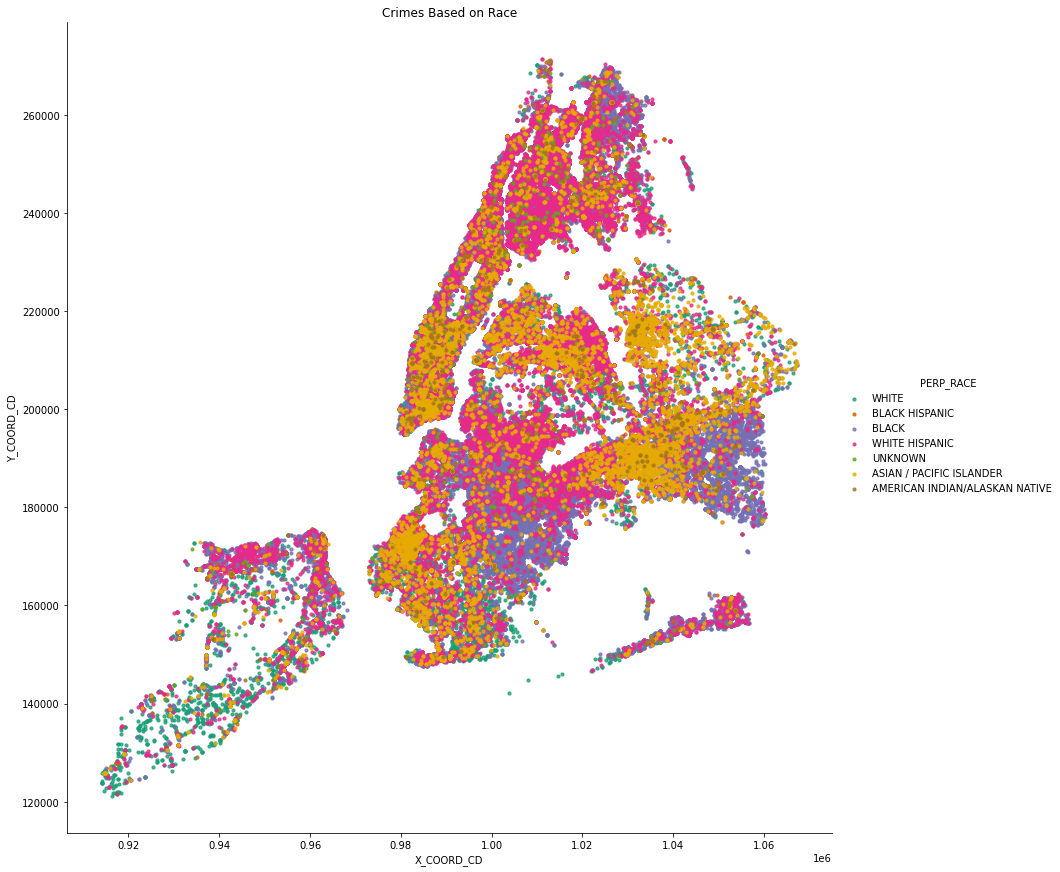

In [ ]:
new_map = crimeX.loc[(crimeX['X_COORD_CD']!=0)]
sns.lmplot('X_COORD_CD', 
           'Y_COORD_CD',
           data=new_map[:],
           fit_reg=False, 
           hue="PERP_RACE",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes Based on Race")

# **We are planning to do:**
We are planning to do clarify relationship between Airbnb housing/price distribution and NYC crimes distribution, borough by borough. With determining this, also we are able to determine are there any correlation with specific crimes and Airbnb housing/price distribution. In other words we can specify which kind of crimes can manipulate Airbnb distributions and which kind of crimes cannot manipulate.

# Machine Learning Models

## Machine Learing Model for Airbnb Dataset

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
price = df['price']

In [ ]:
X = df['longitude'].values.reshape(-1,1)
price_values = price.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,price_values,random_state=42, test_size=0.20)
regress = linear_model.LinearRegression()

regress.fit(X_train, y_train)

price_pred = regress.predict(X_test)
price_pred

array([[174.12200328],
       [118.12989911],
       [184.03543813],
       ...,
       [ 58.70529812],
       [175.51420479],
       [175.34618047]])

Coefficients: 
 [[-800.11580699]]
Mean squared error: 43203.12
Coefficient of determination: 0.02


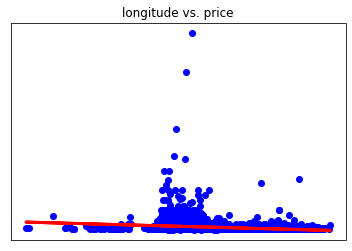

In [ ]:
print('Coefficients: \n', regress.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, price_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, price_pred))

plt.title("longitude vs. price")
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, price_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

* Since mean squared error is very high and also R^2 is very low, so that there is no clear correlation.

In [ ]:
X2 = df['minimum_nights'].values.reshape(-1,1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,price_values,random_state=42, test_size=0.20)

In [ ]:
regress2 = linear_model.LinearRegression()

regress2.fit(X2_train, y2_train)

y2_pred = regress2.predict(X2_test)
y2_pred

array([[151.71355397],
       [160.56435126],
       [151.22184301],
       ...,
       [150.73013205],
       [151.22184301],
       [151.71355397]])

Coefficients: 
 [[0.49171096]]
Mean squared error: 44182.12
Coefficient of determination: 0.00


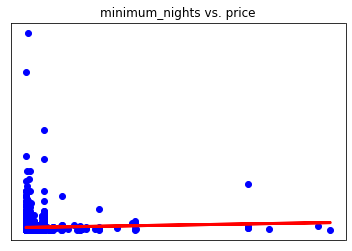

In [ ]:
print('Coefficients: \n', regress2.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y2_test, y2_pred))

# Plot outputs
plt.title("minimum_nights vs. price")
plt.scatter(X2_test, y2_test,  color='blue')
plt.plot(X2_test, y2_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

* Since mean squared error is very high and also R^2 is very low, so that there is no clear correlation.

In [ ]:
X3 = df['availability_365'].values.reshape(-1,1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,price_values,random_state=42, test_size=0.20)

In [ ]:
regress3 = linear_model.LinearRegression()

regress3.fit(X3_train, y3_train)

y3_pred = regress3.predict(X3_test)
y3_pred

array([[165.15629631],
       [147.64649622],
       [136.62739789],
       ...,
       [137.38213065],
       [136.62739789],
       [191.57194301]])

Coefficients: 
 [[0.49171096]]
Mean squared error: 43917.46
Coefficient of determination: 0.01


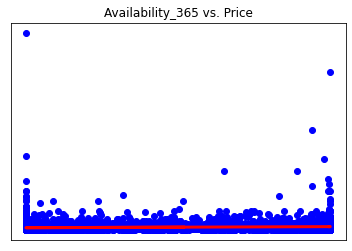

In [ ]:
print('Coefficients: \n', regress2.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y3_test, y3_pred))

# Plot outputs
plt.title("Availability_365 vs. Price")
plt.scatter(X3_test, y3_test,  color='blue')
plt.plot(X3_test, y3_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

* Since mean squared error is very high and also R^2 is very low, so that there is no clear correlation.

## Machine Learning Model for Crime Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
#from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.cluster import KMeans
import seaborn as sns

* Find the crime rates with group by districts and create new data based on the types of crimes.





In [ ]:
district_crime_rates = pd.DataFrame(columns=['theft_count', 'assault_count', 'sexual_offense_count', 
                                             'weapons_offense_count', 'criminal_offense_count', 
                                             'human_trafficking_count', 'narcotic_offense_count'])
district_crime_rates = district_crime_rates.astype(int) 

for i in range(1, 124):   # max number of district is 123
    temp_district_df = crime[crime['ARREST_PRECINCT'] == i] 

    temp_district_theft = temp_district_df[(temp_district_df['Crime_desc'] == 'THEFT-FRAUD') ] 
    num_theft = temp_district_theft.Crime_desc.count() 
    
    temp_district_assault = temp_district_df[temp_district_df['Crime_desc'] == 'ASSAULT 3 & RELATED OFFENSES'] 
    num_assault = temp_district_assault.Crime_desc.count()    
    
    temp_district_sexual_offense = temp_district_df[temp_district_df['Crime_desc'] == 'SEX CRIMES'] 
    num_sexual_offense = temp_district_sexual_offense.Crime_desc.count()
    
    temp_district_weapons_offense = temp_district_df[temp_district_df['Crime_desc'] == 'DANGEROUS WEAPONS'] 
    num_weapons_offense = temp_district_weapons_offense.Crime_desc.count()
    
    temp_district_criminal_offense = temp_district_df[(temp_district_df['Crime_desc'] == 'CRIMINAL MISCHIEF & RELATED OF') | (temp_district_df['Crime_desc'] == 'HOMICIDE-NEGLIGENT-VEHICLE')] 
    num_criminal_offense = temp_district_criminal_offense.Crime_desc.count()
    
    temp_district_human_trafficking = temp_district_df[(temp_district_df['Crime_desc'] == 'VEHICLE AND TRAFFIC LAW') | (temp_district_df['Crime_desc'] == 'INTOXICATED & IMPAIRED DRIVING')] 
    num_human_trafficking = temp_district_human_trafficking.Crime_desc.count()
    
    temp_district_narcotic_offense = temp_district_df[temp_district_df['Crime_desc'] == 'DANGEROUS DRUGS'] 
    num_narcotic_offense = temp_district_narcotic_offense.Crime_desc.count()
    
    #temp_district_other_offense = temp_district_df[temp_district_df['Crime_desc'] == 'OTHER_OFFENSE'] 
    #num_other_offense = temp_district_other_offense.Crime_desc.count()

    district_crime_rates.loc[i] = [num_theft, num_assault, num_sexual_offense, num_weapons_offense, num_criminal_offense, num_human_trafficking, num_narcotic_offense]    
    
district_crime_rates.head()

,theft_count,assault_count,sexual_offense_count,weapons_offense_count,criminal_offense_count,human_trafficking_count,narcotic_offense_count
1,2,212,35,29,354,35,49
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,55,322,120,52,242,22,216


In [ ]:
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)

###KMeans Cluster


### Find the best value of k

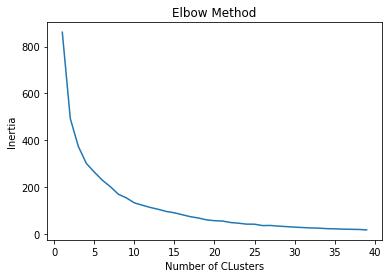

In [ ]:
n_clusters_range = np.arange(1, 40)
# store intra cluster variation value
intra_cluster_var = []

for k in n_clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(district_crime_rates_standardized)
    
    # append intra cluster variation, i.e. inertia attribute in the model
    intra_cluster_var.append(model.inertia_)
    
plt.plot(n_clusters_range, intra_cluster_var)
plt.xlabel("Number of CLusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

* Use k in order to divide the into 40 clusters
* Because line getting smoother after the 40






In [ ]:
kmeans = KMeans(n_clusters = 40, init = 'k-means++', random_state = 42) # we set cluster as 40 because we found line getting smoother after 40
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of the cluster numbering with 1 instead of 0
#y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 40
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))

In [ ]:
district_crime_rates['district'] = district_crime_rates.index # we define district as index 
# we put k_mean_cluster data in our district_crime_rate data
district_crime_rates = district_crime_rates[['district', 'kmeans_cluster', 'theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count']]

In [ ]:
district_crime_rates = district_crime_rates.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count'], axis=1)
district_crime_rates.head(123)

,district,kmeans_cluster
1,1,17
2,2,1
3,3,1
4,4,1
5,5,4
...,...,...
119,119,1
120,120,19
121,121,20
122,122,38


In [ ]:
crime = crime.rename(columns={'ARREST_PRECINCT':'district'})

* Let's merge the new dataset which is consist of the rate of crime by district and our main dataset with common district column. 

* Then, plot a map with kmeans clusters which is split the data into clusters by crime types and district.

In [ ]:
crimes_data_clustered = pd.merge(crime, district_crime_rates, on='district', how='inner')

### Map

Text(0.5, 1.0, 'KMeans Clustering of Crimes by District')

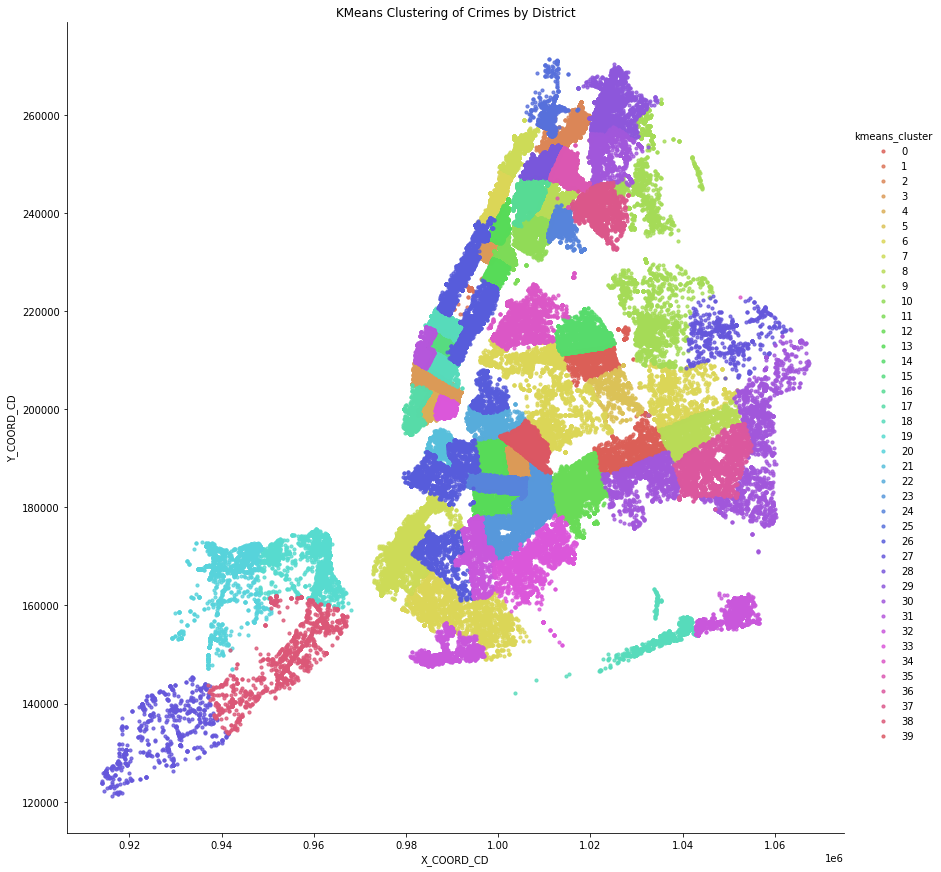

In [ ]:
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['X_COORD_CD']!=0)]
sns.lmplot('X_COORD_CD', 
           'Y_COORD_CD',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="kmeans_cluster",
           palette= sns.color_palette("hls", 40),
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("KMeans Clustering of Crimes by District")

* number of different colors in each borough gives us how many disticnt crimes that boroughs have. Therefore, higher color range means higher crimes rate.

* According to our observations, Manhattan, Bronx and Brooklyn are more dangerous places compared to other NYC boroughs.

### Models

In [ ]:
#Converting the numercial attributes to categorical attributes
crimeX.AGE_GROUP = pd.Categorical(crimeX.AGE_GROUP)
crimeX.PERP_SEX = pd.Categorical(crimeX.PERP_SEX)
crimeX.ARREST_DATE = pd.Categorical(crimeX.ARREST_DATE)
crimeX.PERP_RACE = pd.Categorical(crimeX.PERP_RACE)
crimeX.OFNS_DESC = pd.Categorical(crimeX.OFNS_DESC)
crimeX.ARREST_BORO = pd.Categorical(crimeX.ARREST_BORO)

In [ ]:
crimes_data_prediction = crimeX.drop(['ARREST_DATE','ARREST_KEY','PD_CD','PD_DESC','KY_CD','LAW_CODE','LAW_CAT_CD','ARREST_PRECINCT','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD'],axis=1)

In [ ]:
crimes_data_prediction.head()

,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,INTOXICATED & IMPAIRED DRIVING,M,25-44,M,WHITE,40.841085,-73.939769
1,THEFT-FRAUD,Q,25-44,M,BLACK HISPANIC,40.596012,-73.742116
2,HOMICIDE-NEGLIGENT-VEHICLE,M,18-24,M,BLACK,40.789803,-73.952289
3,CRIMINAL MISCHIEF & RELATED OF,S,18-24,M,BLACK,40.645023,-74.077217
4,ASSAULT 3 & RELATED OFFENSES,M,25-44,M,BLACK,40.787875,-73.928182


In [ ]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214617 entries, 0 to 214616
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   OFNS_DESC    214458 non-null  category
 1   ARREST_BORO  214617 non-null  category
 2   AGE_GROUP    214617 non-null  category
 3   PERP_SEX     214617 non-null  category
 4   PERP_RACE    214617 non-null  category
 5   Latitude     214617 non-null  float64 
 6   Longitude    214617 non-null  float64 
dtypes: category(5), float64(2)
memory usage: 4.3 MB


In [ ]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [ ]:
crimes_data_prediction

,Latitude,Longitude,OFNS_DESC_ADMINISTRATIVE CODES,OFNS_DESC_AGRICULTURE & MRKTS LAW-UNCLASSIFIED,OFNS_DESC_ALCOHOLIC BEVERAGE CONTROL LAW,OFNS_DESC_ANTICIPATORY OFFENSES,OFNS_DESC_ARSON,OFNS_DESC_ASSAULT 3 & RELATED OFFENSES,OFNS_DESC_BURGLAR'S TOOLS,OFNS_DESC_BURGLARY,OFNS_DESC_CHILD ABANDONMENT/NON SUPPORT,OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF,OFNS_DESC_CRIMINAL TRESPASS,OFNS_DESC_DANGEROUS DRUGS,OFNS_DESC_DANGEROUS WEAPONS,OFNS_DESC_DISORDERLY CONDUCT,OFNS_DESC_DISRUPTION OF A RELIGIOUS SERV,OFNS_DESC_ENDAN WELFARE INCOMP,OFNS_DESC_ESCAPE 3,OFNS_DESC_FELONY ASSAULT,OFNS_DESC_FOR OTHER AUTHORITIES,OFNS_DESC_FORGERY,OFNS_DESC_FRAUDS,OFNS_DESC_FRAUDULENT ACCOSTING,OFNS_DESC_GAMBLING,OFNS_DESC_GRAND LARCENY,OFNS_DESC_GRAND LARCENY OF MOTOR VEHICLE,OFNS_DESC_HARRASSMENT 2,"OFNS_DESC_HOMICIDE-NEGLIGENT,UNCLASSIFIE",OFNS_DESC_HOMICIDE-NEGLIGENT-VEHICLE,OFNS_DESC_INTOXICATED & IMPAIRED DRIVING,OFNS_DESC_INTOXICATED/IMPAIRED DRIVING,OFNS_DESC_JOSTLING,OFNS_DESC_KIDNAPPING,OFNS_DESC_KIDNAPPING & RELATED OFFENSES,OFNS_DESC_LOITERING FOR DRUG PURPOSES,"OFNS_DESC_LOITERING/GAMBLING (CARDS, DIC",OFNS_DESC_MISCELLANEOUS PENAL LAW,OFNS_DESC_MOVING INFRACTIONS,OFNS_DESC_MURDER & NON-NEGL. MANSLAUGHTE,...,OFNS_DESC_NYS LAWS-UNCLASSIFIED FELONY,OFNS_DESC_NYS LAWS-UNCLASSIFIED VIOLATION,OFNS_DESC_OFF. AGNST PUB ORD SENSBLTY &,OFNS_DESC_OFFENSES AGAINST PUBLIC ADMINI,OFNS_DESC_OFFENSES AGAINST PUBLIC SAFETY,OFNS_DESC_OFFENSES AGAINST THE PERSON,OFNS_DESC_OFFENSES INVOLVING FRAUD,OFNS_DESC_OFFENSES RELATED TO CHILDREN,OFNS_DESC_OTHER OFFENSES RELATED TO THEF,OFNS_DESC_OTHER STATE LAWS,OFNS_DESC_OTHER STATE LAWS (NON PENAL LA,OFNS_DESC_OTHER STATE LAWS (NON PENAL LAW),OFNS_DESC_OTHER TRAFFIC INFRACTION,OFNS_DESC_PARKING OFFENSES,OFNS_DESC_PETIT LARCENY,OFNS_DESC_POSSESSION OF STOLEN PROPERTY,OFNS_DESC_PROSTITUTION & RELATED OFFENSES,OFNS_DESC_RAPE,OFNS_DESC_ROBBERY,OFNS_DESC_SEX CRIMES,OFNS_DESC_THEFT OF SERVICES,OFNS_DESC_THEFT-FRAUD,OFNS_DESC_UNAUTHORIZED USE OF A VEHICLE,OFNS_DESC_UNLAWFUL POSS. WEAP. ON SCHOOL,OFNS_DESC_VEHICLE AND TRAFFIC LAWS,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,AGE_GROUP_25-44,AGE_GROUP_45-64,AGE_GROUP_65+,AGE_GROUP_<18,PERP_SEX_M,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,40.841085,-73.939769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,40.596012,-73.742116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,40.789803,-73.952289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,40.645023,-74.077217,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,40.787875,-73.928182,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214612,40.766905,-73.963731,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
214613,40.673777,-73.763806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
214614,40.674632,-73.939378,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#Train test split with a test set size of 20% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['AGE_GROUP_<18'],axis=1),crimes_data_prediction['AGE_GROUP_<18'], test_size=0.2, random_state=42)

In [ ]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

####Gaussain Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8086851178827695

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[32725  8201]
 [   11  1987]]


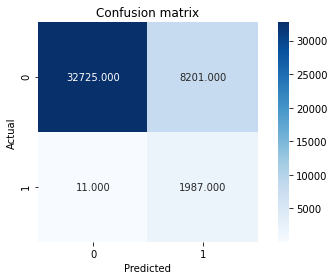

In [ ]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

####Decision Tree 

In [ ]:
#Decision tree with Entropy as attribute measure
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9480011182555214

In [ ]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[39908  1018]
 [ 1214   784]]


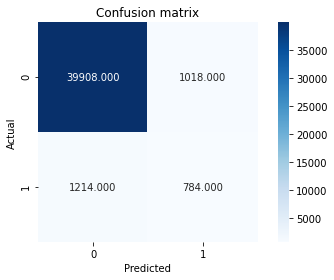

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

####Random Forest

In [ ]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9540816326530612

In [ ]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 1917  5960]
 [ 3117 31930]]


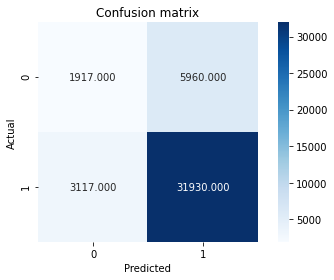

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

#RESULT & DISCUSSION


#Airbnb Dataset
*  Manhattan has the more expensive house's prices compared to other boroguhs of NYC.
*  Manhattan has wider range of house prices, altough it has wider prices, it has also higher prices.
*  Number of Entire home in Manhattan is more than others and this can be the reason of why Manhattan has more expensive house, because price of entire home is more expensive than other room types.
*  According to total number of houses in Manhattan, Manhattan is the most popular places for airbnb housing. And the foolowings are; Brooklyn, Queens, Bronx, Staten Island.


#Crime Dataset
* The most of the crimes in NYC found in Brooklyn And followings are; Manhattan, Bronx, Queen, Staten Island.
* Crime Rates in NYC in ascending order; Bronx, Manhattan, Brooklyn, Queens, Staten Island
* According to heat map of overall crimes, Bronx and Manhattan are leading(in order)
* According to distribution of crimes based on their harshness, the most hasrshness crimes in Brooklyn. On the other hand, non-harshness crime types in west side of the Queens and Staten Island.
* The most of the crimes in NYC are commited by Asian and White Hispanic. (So, Blacks are innocent :) )

#Machine Learning Models
* We cannot find clear correlation between our features and price distribution with using linear regression method 
* According to our observations based on KMeans, Manhattan, Bronx and Brooklyn are more dangerous places compared to other NYC boroughs.
* The best model that fit our cases is Random Forest because accuracy rate of Random Forest is bigger than others. We tried most of the cases, in some of them these three models perform very similar. but some cases Random Forest makes great differences. We try another models like kNN but we cannot fit our dataset.


#CONCLUSION
Our aim was "to find the relationship between price/housing distribution of Airbnb rentals and crimes in NYC." We observed that the most expensive airbnb houses are in Manhattan. According to our findings that related with crime rates, Manhattan stands in the second place with %3.3, altough it stands in second place, there is %0.1 difference between the first one. Also, since Manhattan has the most popular place for airbnb houses, we can say that people have tendency to rent houses in Manhattan, however, according to KMeans, Manhattan has the widest range of crime type and as we said before it has one of the most intense crime rate. Moreover, Staten Island has the least crime rates and least variety of crimes, but price of the airbnb houses is less than the other boroughs. Therefore, we cannot find any relation between price and crime distribution.